In [1]:
# import all the libraries to be used in the project.

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [4]:
df_2021_2022 = pd.read_csv('C:/Users/ronal/df_flight_2021cln3.csv')   # for df_flight cleaned
df_2021_2022

,Unnamed: 0,MktCoupons,Quarter,Origin,OriginWac,Dest,DestWac,Passengers,StraightFlight,Airlines,TicketPrice
0,0,1,1,DFW,74,LAX,91,1.0,1235.0,AA,97.14
1,1,1,1,DFW,74,LAX,91,1.0,1235.0,AA,421.68
2,2,1,1,ATL,34,LAX,91,1.0,1947.0,AA,123.68
3,3,1,1,DFW,74,LAX,91,1.0,1235.0,AA,189.12
4,4,1,1,ORD,41,LAX,91,1.0,1744.0,AA,141.99
...,...,...,...,...,...,...,...,...,...,...,...
201505,201505,1,5,ATL,34,MCO,33,1.0,404.0,DL,179.43
201506,201506,1,5,ORD,41,LGA,22,1.0,733.0,DL,234.19
201507,201507,1,5,ATL,34,LGA,22,1.0,762.0,DL,70.38
201508,201508,1,5,ATL,34,ORD,41,1.0,606.0,DL,101.71


In [161]:
df_2021_2022 = df_2021_2022.drop(['Unnamed: 0'], axis = 1)

In [162]:
df_2021_2022['OriginWac'].value_counts()

34    44785
41    44470
82    42452
74    39990
81    29813
Name: OriginWac, dtype: int64

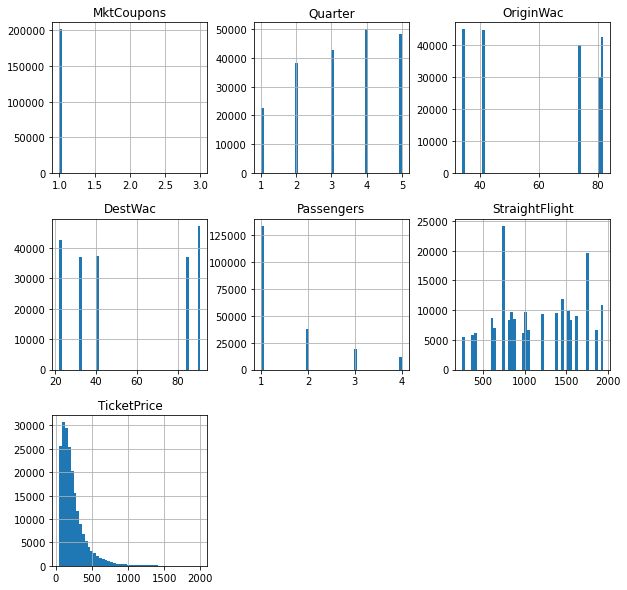

In [5]:
df_2021_2022.hist(figsize = (10,10), bins = 50)
plt.show()

In [163]:

df_2021_2022['Quarter'] = df_2021_2022['Quarter'].astype('object')
df_2021_2022['MktCoupons'] = df_2021_2022['MktCoupons'].astype('object')

In [8]:
df_2021_2022.dtypes

MktCoupons         object
Quarter            object
Origin             object
OriginWac           int64
Dest               object
DestWac             int64
Passengers        float64
StraightFlight    float64
Airlines           object
TicketPrice       float64
dtype: object

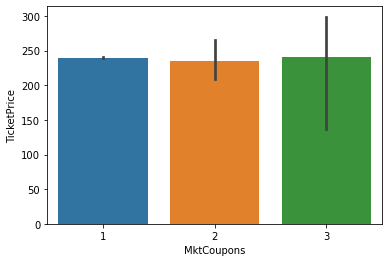

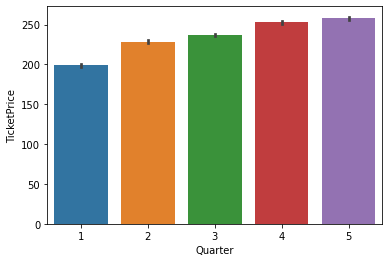

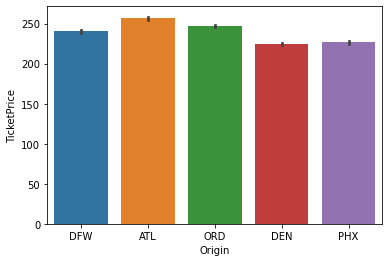

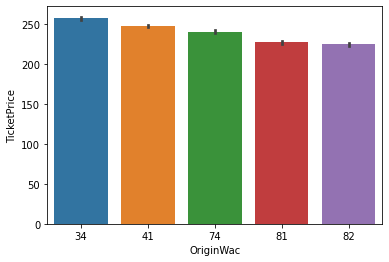

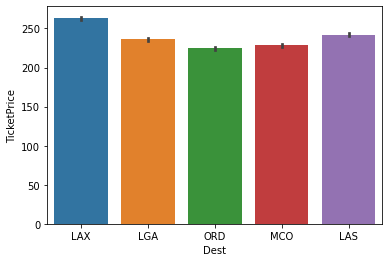

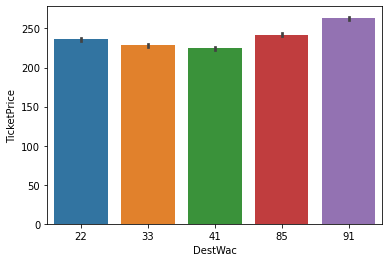

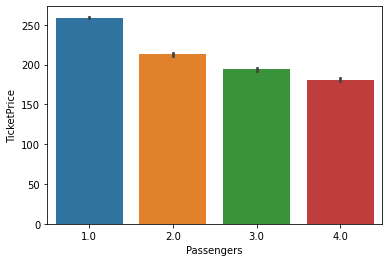

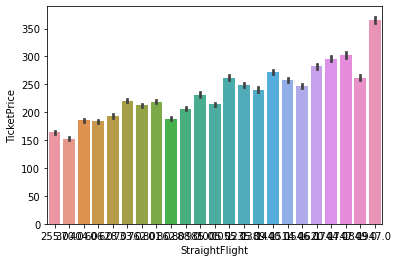

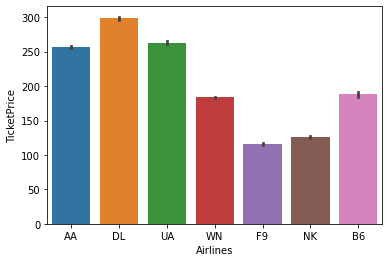

In [10]:
for x in df_2021_2022.columns[0:9]:
    sns.barplot(x = df_2021_2022[x], y = 'TicketPrice', data = df_2021_2022)
    plt.show()

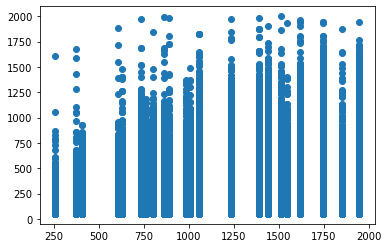

In [11]:
plt.scatter(x = 'StraightFlight', y = 'TicketPrice', data = df_2021_2022 )
plt.show()

In [ ]:
plt.scatter(x = 'StraightFlight', y = 'TicketPrice', data = df_2021_2022 )
plt.show()

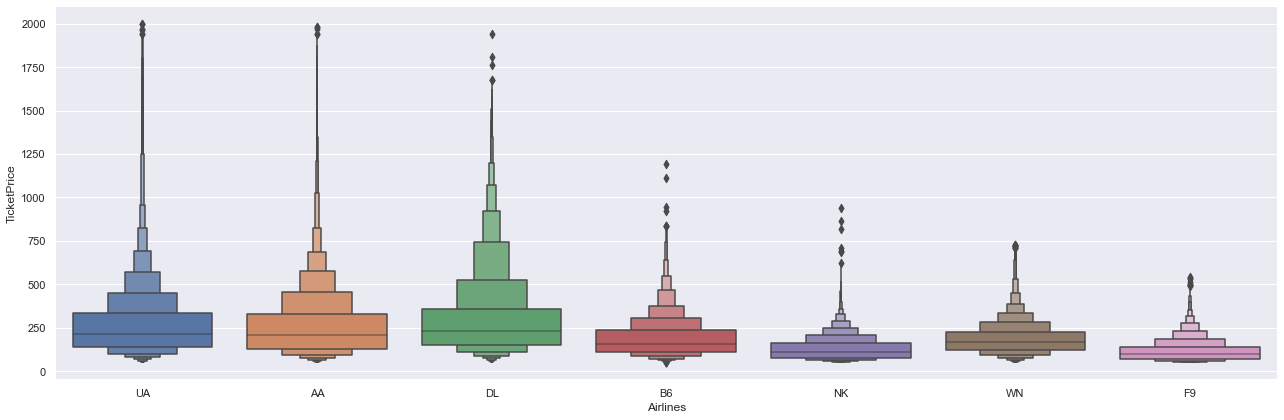

In [12]:
sns.set(rc = {'figure.figsize':(15, 10)})

sns.catplot(y = 'TicketPrice', x = 'Airlines', data = df_2021_2022.sort_values('TicketPrice', ascending = False),
           kind = 'boxen', height = 6, aspect = 3)

In [180]:
df_2021_2022['Passengers'].value_counts()

1.0    133547
2.0     37780
3.0     18758
4.0     11425
Name: Passengers, dtype: int64

In [23]:
df_2021_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201510 entries, 0 to 201509
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   MktCoupons      201510 non-null  object 
 1   Quarter         201510 non-null  object 
 2   Origin          201510 non-null  object 
 3   OriginWac       201510 non-null  int64  
 4   Dest            201510 non-null  object 
 5   DestWac         201510 non-null  int64  
 6   Passengers      201510 non-null  float64
 7   StraightFlight  201510 non-null  float64
 8   Airlines        201510 non-null  object 
 9   TicketPrice     201510 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 15.4+ MB


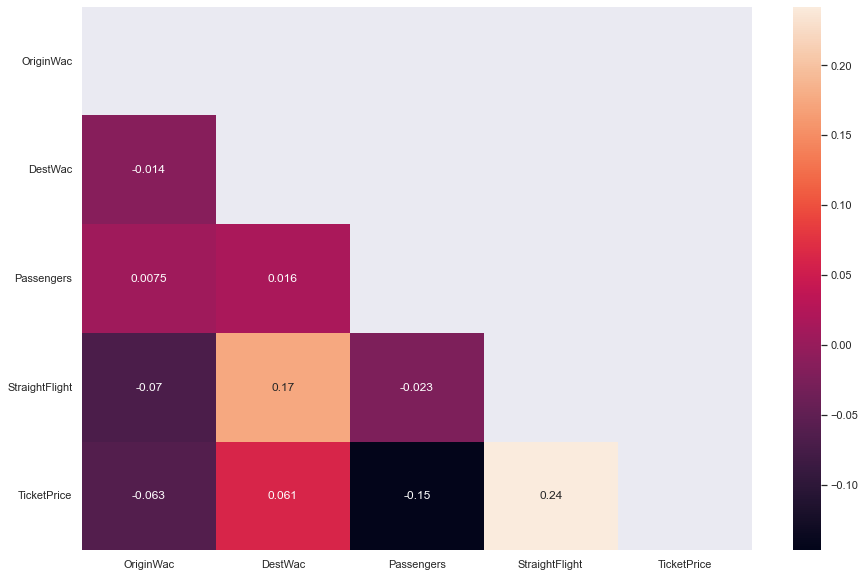

In [13]:
correlations_matrix = df_2021_2022.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(correlations_matrix, mask = mask, annot= True)
plt.yticks(rotation = 0)
plt.show()

In [14]:
correlations_matrix.shape

(5, 5)

In [15]:
df_2021_2022.describe().T 

,count,mean,std,min,25%,50%,75%,max
OriginWac,201510.0,60.548543,20.873733,34.0,41.0,74.0,81.0,82.0
DestWac,201510.0,55.341249,28.737218,22.0,33.0,41.0,85.0,91.0
Passengers,201510.0,1.543750,0.880026,1.0,1.0,1.0,2.0,4.0
StraightFlight,201510.0,1147.501256,477.516841,255.0,762.0,1055.0,1546.0,1947.0
TicketPrice,201510.0,239.974312,182.859206,50.0,120.5,189.0,296.5,2000.0


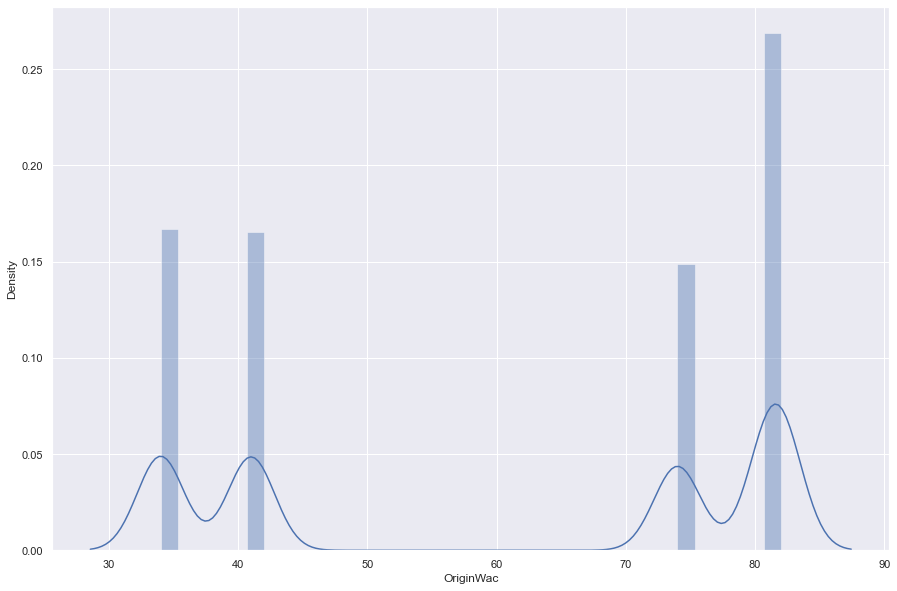

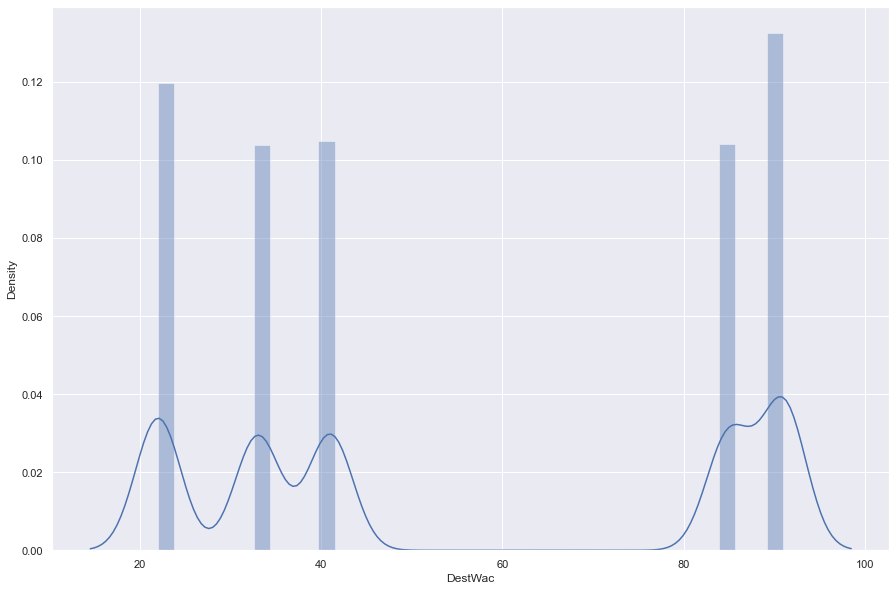

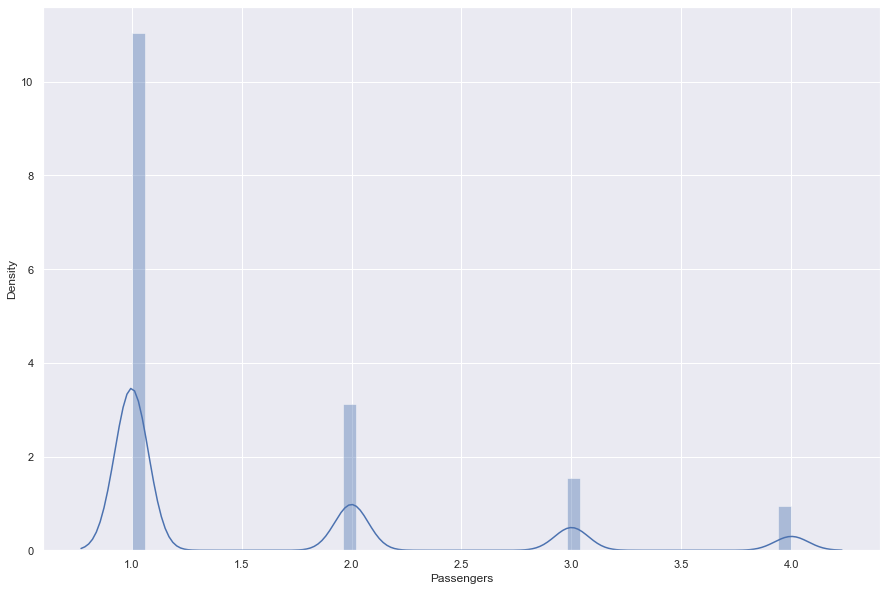

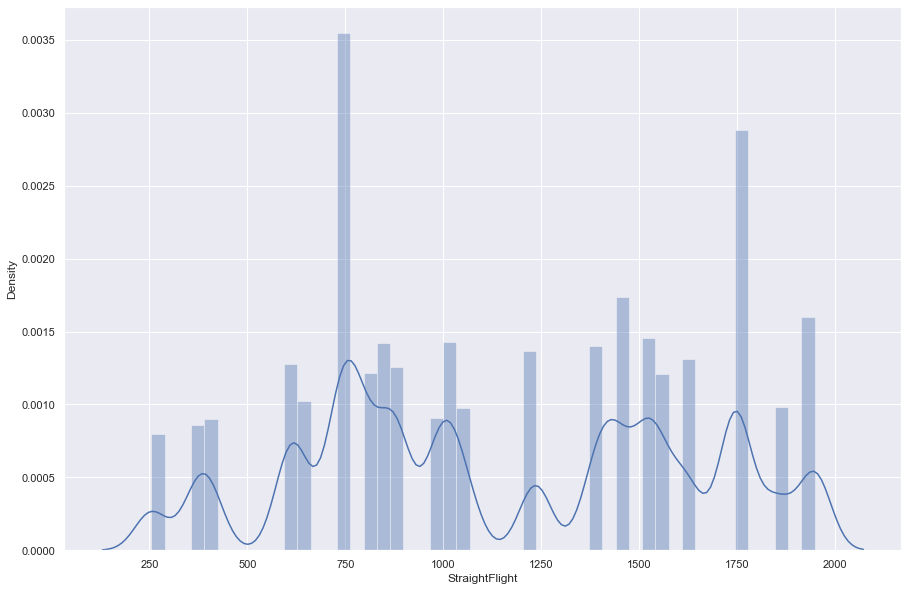

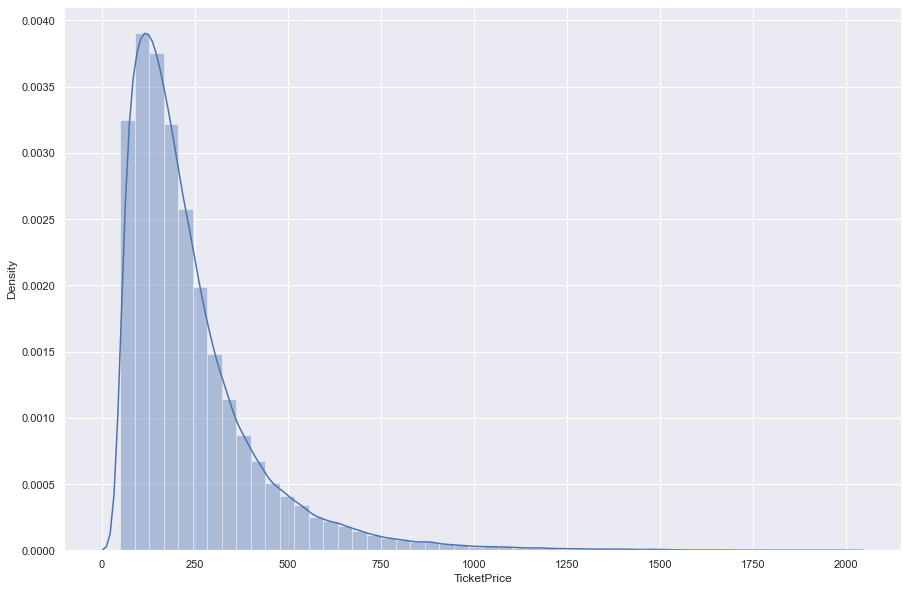

In [16]:
for x in df_2021_2022.columns:
    if df_2021_2022[x].dtype == "int64" or df_2021_2022[x].dtype == "float64":
        sns.distplot(df_2021_2022[x])
        plt.show()

In [ ]:
list2 =['TicketPrice']

lost_data = 0
for x in list2:
    o_size = df_2021_2022.shape[0]
    iqr = np.percentile(df_2021_2022[x],75) - np.percentile(df_2021_2022[x],25)
    upper_limit = np.percentile(df_2021_2022[x],75) + 1.5*iqr
    lower_limit = np.percentile(df_2021_2022[x],25) - 0.1*iqr
    gk_log = df_2021_2022[(df_2021_2022[x]>lower_limit) & (df_2021_2022[x]<upper_limit)][x]
    lost_data += o_size - gk_log.shape[0]
    sns.distplot(gk_log)
    plt.show()

In [17]:
Y = df_2021_2022['TicketPrice']                      # target
X = df_2021_2022.drop(['TicketPrice'], axis = 1)     # features  
x_num = X.select_dtypes(np.number)
x_cat = X.select_dtypes(np.object)

In [18]:
X.shape, Y.shape

((201510, 9), (201510,))

In [19]:
pd.DataFrame(X).head()

,MktCoupons,Quarter,Origin,OriginWac,Dest,DestWac,Passengers,StraightFlight,Airlines
0,1,1,DFW,74,LAX,91,1.0,1235.0,AA
1,1,1,DFW,74,LAX,91,1.0,1235.0,AA
2,1,1,ATL,34,LAX,91,1.0,1947.0,AA
3,1,1,DFW,74,LAX,91,1.0,1235.0,AA
4,1,1,ORD,41,LAX,91,1.0,1744.0,AA


In [20]:
Y

0          97.14
1         421.68
2         123.68
3         189.12
4         141.99
           ...  
201505    179.43
201506    234.19
201507     70.38
201508    101.71
201509    168.35
Name: TicketPrice, Length: 201510, dtype: float64

In [21]:
x_num.head()

,OriginWac,DestWac,Passengers,StraightFlight
0,74,91,1.0,1235.0
1,74,91,1.0,1235.0
2,34,91,1.0,1947.0
3,74,91,1.0,1235.0
4,41,91,1.0,1744.0


In [22]:
x_cat.head()

,MktCoupons,Quarter,Origin,Dest,Airlines
0,1,1,DFW,LAX,AA
1,1,1,DFW,LAX,AA
2,1,1,ATL,LAX,AA
3,1,1,DFW,LAX,AA
4,1,1,ORD,LAX,AA


In [23]:
transformer = Normalizer().fit(x_num)
x_normalized = transformer.transform(x_num)
encoder = OneHotEncoder().fit(x_cat)
encoded = encoder.transform(x_cat).toarray()
X = np.concatenate((x_normalized, encoded), axis = 1)

In [24]:
x_normalized

array([[5.96505989e-02, 7.33541149e-02, 8.06089174e-04, 9.95520130e-01],
       [5.96505989e-02, 7.33541149e-02, 8.06089174e-04, 9.95520130e-01],
       [1.74410652e-02, 4.66804979e-02, 5.12972505e-04, 9.98757467e-01],
       ...,
       [4.45565048e-02, 2.88306796e-02, 1.31048544e-03, 9.98589902e-01],
       [5.58900670e-02, 6.73968454e-02, 1.64382550e-03, 9.96158252e-01],
       [4.45565048e-02, 2.88306796e-02, 1.31048544e-03, 9.98589902e-01]])

In [25]:
encoded

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.4, random_state = 50)

In [35]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [36]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.074874,0.033390,0.001012,0.996633,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.056139,0.028416,0.000693,0.998018,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.017441,0.046680,0.000513,0.998757,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.027028,0.056034,0.002637,0.998059,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.043759,0.017828,0.001080,0.998882,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120901,0.056139,0.028416,0.000693,0.998018,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
120902,0.052954,0.021311,0.000646,0.998369,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
120903,0.053194,0.015814,0.000719,0.998459,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
120904,0.128322,0.133017,0.004695,0.982760,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [37]:
y_train

142775    731.50
33052     342.00
148016    654.00
72679     134.50
42338     153.79
           ...  
59358     202.00
179489    159.00
153709    152.04
103904    313.00
145072    353.50
Name: TicketPrice, Length: 120906, dtype: float64

In [38]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
print(r2_score(y_test, predictions), mse(y_test, predictions))

0.16911968304851277 27900.26845877992


In [41]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors = 80)  
model.fit(X_train, y_train)

predictions = model.predict(X_test)
score = model.score(X_test, y_test)

lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
r2_score(y_test, predictions)

0.22163268249845014

In [42]:
clf = RandomForestRegressor(max_depth = 6, random_state = 0)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.1978057941713265


Text(0, 0.5, 'Accuracy')

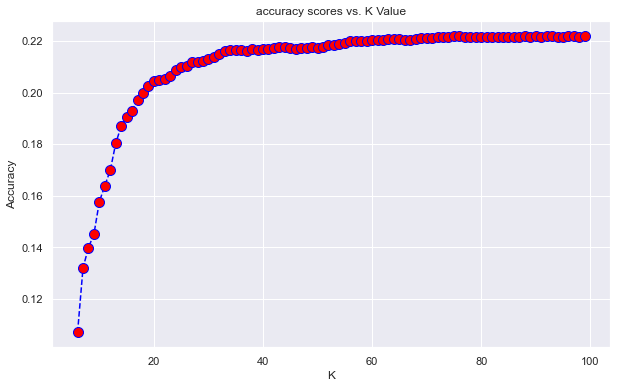

In [40]:
#bias over fitting

scores = []
for i in range(6, 100):
    model = KNeighborsRegressor(n_neighbors = i)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))


plt.figure(figsize = (10,6))
plt.plot(range(6, 100),scores,color = 'blue',linestyle = 'dashed', 
         marker = 'o',markerfacecolor = 'red', markersize = 10)
plt.title('accuracy scores vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')